In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart.csv')

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

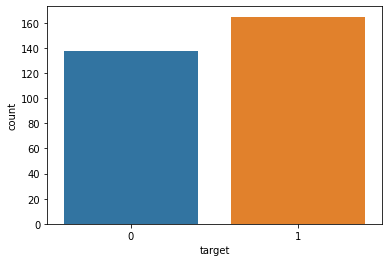

In [6]:
sns.countplot(x = 'target' , data=dataset)

<AxesSubplot:>

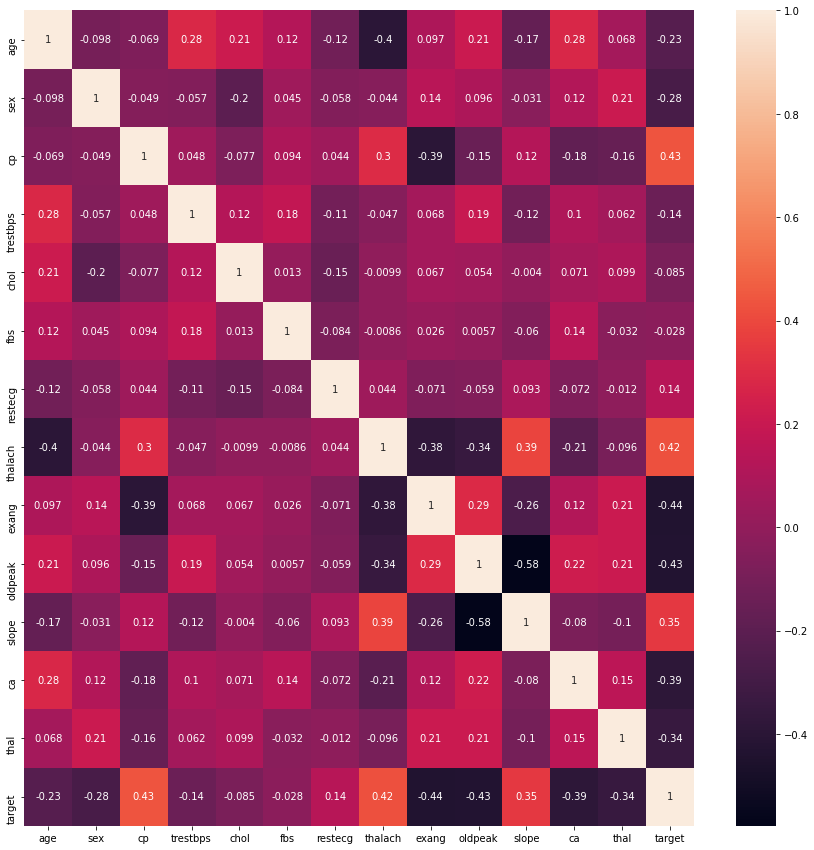

In [7]:
corr_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat , annot=True)

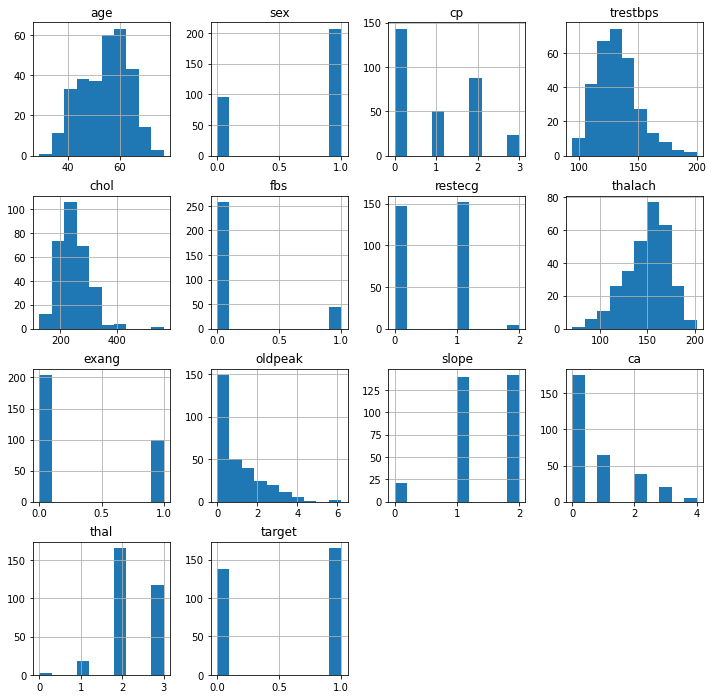

In [8]:
#plot histograms for each column

dataset.hist(figsize=(12,12))
plt.show()

In [9]:
dataset2 = pd.get_dummies(dataset , columns=['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'ca' , 'thal'])

In [10]:
cols = ['cp_0','cp_1','cp_2','cp_3', 'trestbps', 'chol', 'fbs_0','fbs_1', 'restecg_0','restecg_1','restecg_2', 'thalach', 'exang_0','exang_1']

In [11]:
X = dataset2[cols]
y = dataset2.target

In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state = 42)

In [14]:
x_train.shape

(227, 14)

In [15]:
x_test.shape

(76, 14)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
x_train

array([[-0.91139737,  2.34216018, -0.6815542 , ...,  0.63335882,
         0.6815542 , -0.6815542 ],
       [-0.91139737, -0.42695628,  1.46723474, ..., -0.69663611,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ...,  0.58902565,
         0.6815542 , -0.6815542 ],
       ...,
       [-0.91139737, -0.42695628, -0.6815542 , ..., -0.8296356 ,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ..., -0.25330447,
         0.6815542 , -0.6815542 ],
       [-0.91139737,  2.34216018, -0.6815542 , ...,  1.29835628,
         0.6815542 , -0.6815542 ]])

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train , y_train)

KNeighborsClassifier()

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
x_test

array([[ 1.09721625, -0.42695628, -0.6815542 , ..., -1.67196572,
        -1.46723474,  1.46723474],
       [-0.91139737, -0.42695628, -0.6815542 , ...,  0.41169299,
         0.6815542 , -0.6815542 ],
       [-0.91139737, -0.42695628,  1.46723474, ...,  1.03235729,
         0.6815542 , -0.6815542 ],
       ...,
       [ 1.09721625, -0.42695628, -0.6815542 , ...,  1.60868842,
         0.6815542 , -0.6815542 ],
       [ 1.09721625, -0.42695628, -0.6815542 , ..., -0.78530243,
         0.6815542 , -0.6815542 ],
       [-0.91139737,  2.34216018, -0.6815542 , ...,  0.23436034,
         0.6815542 , -0.6815542 ]])

In [21]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

<AxesSubplot:>